# Color Threshold, Green Screen

### Import Resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read and Display the Image

Image dimensions: (450, 660, 3)


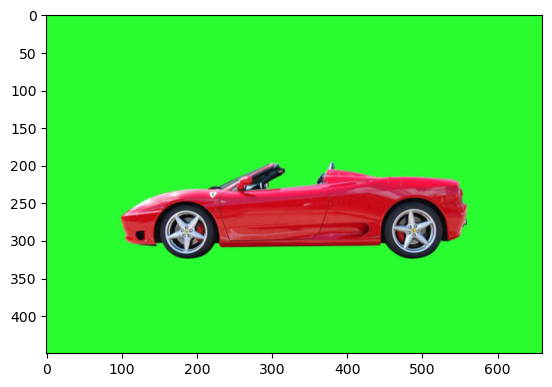

In [4]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth(color))
print('Image dimensions:', image.shape)

# Display the image
plt.imshow(image);

### Define the Color Threshold

In [16]:
# Define color selection boundaries in RGB values
lower_green = np.array([0, 100, 0])
upper_green = np.array([150, 255, 150])

### Create a Mask

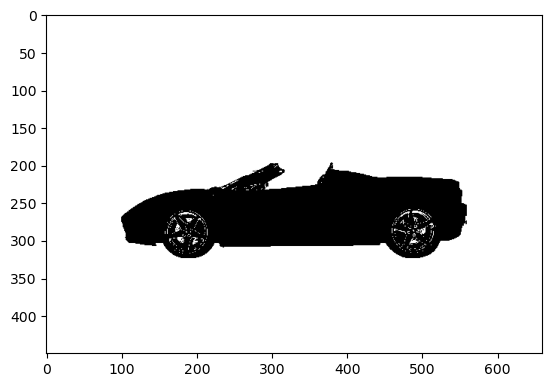

In [18]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Display the mask
plt.imshow(mask, cmap = 'gray');

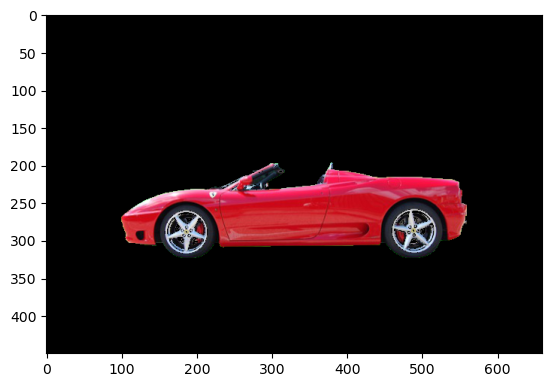

In [20]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display
plt.imshow(masked_image);

### Mask and Add a Background Image

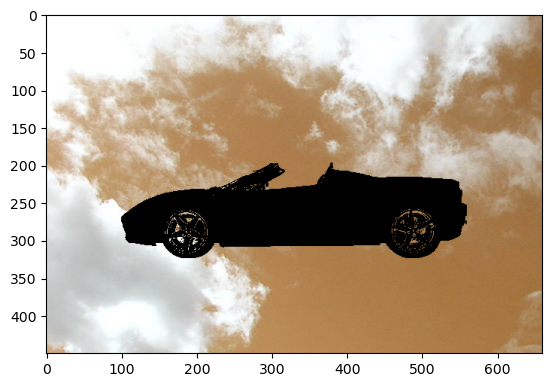

In [22]:
# Load in a background image, and convert it to RGB
background_image = mpimg.imread('images/sky.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop or resize the background to be the right size (450 x 660)
crop_background = background_image[0:450, 0:660]

# Mask the cropped background so that the car area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display
plt.imshow(crop_background);

### Create a Complete Image

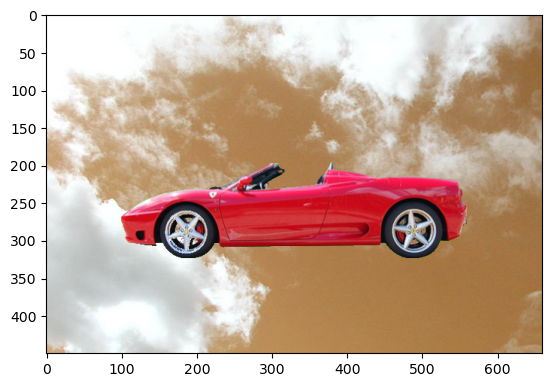

In [23]:
completed_image = masked_image + crop_background

# Display
plt.imshow(completed_image);